<a href="https://colab.research.google.com/github/phuongha47/vinmec_pre/blob/main/Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Read data

In [246]:
# pip install underthesea

In [247]:
import pandas as pd
import re
from underthesea import sent_tokenize

In [285]:
df_train = pd.read_csv(r'/content/drive/MyDrive/QA_KLTN/Dataset/Data_preprocess/Data merged/train.csv')
df_test = pd.read_csv(r'/content/drive/MyDrive/QA_KLTN/Dataset/Data_preprocess/Data merged/test.csv')
df_val = pd.read_csv(r'/content/drive/MyDrive/QA_KLTN/Dataset/Data_preprocess/Data merged/val.csv')


In [249]:
s1 = u'ÀÁÂÃÈÉÊÌÍÒÓÔÕÙÚÝàáâãèéêìíòóôõùúýĂăĐđĨĩŨũƠơƯưẠạẢảẤấẦầẨẩẪẫẬậẮắẰằẲẳẴẵẶặẸẹẺẻẼẽẾếỀềỂểỄễỆệỈỉỊịỌọỎỏỐốỒồỔổỖỗỘộỚớỜờỞởỠỡỢợỤụỦủỨứỪừỬửỮữỰựỲỳỴỵỶỷỸỹ'
s0 = u'AAAAEEEIIOOOOUUYaaaaeeeiioooouuyAaDdIiUuOoUuAaAaAaAaAaAaAaAaAaAaAaAaEeEeEeEeEeEeEeEeIiIiOoOoOoOoOoOoOoOoOoOoOoOoUuUuUuUuUuUuUuYyYyYyYy'
def remove_accents(text):
	for c in text:
		if c in s1:
			 text = text.replace(c,s0[s1.index(c)])
	return text

In [250]:
# for i in range(len(df_train["long_question"])):
#   try: 
#     df_train["long_question"][i] = remove_accents(df_train["long_question"][i])
#   except:
#     print ('') 
# for i in range(len(df_train["answer"])):
#   try: 
#     df_train["answer"][i] = remove_accents(df_train["answer"][i])
#   except:
#     print ('') 

# Data understand

## Size 

In [286]:
print('Size TRAIN:', len(df_train))
print('Size TEST:', len(df_test))
print('Size VAL:', len(df_val))

Size TRAIN: 8201
Size TEST: 1025
Size VAL: 1016


## Document statistics by number of sentences

### Answer

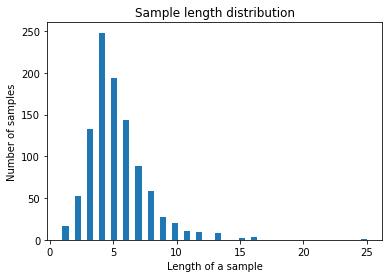

In [252]:
import matplotlib.pyplot as plt

plt.hist([len(sent_tokenize(s)) for s in df_train['answer']], 50)
plt.xlabel('Length of a sample')
plt.ylabel('Number of samples')
plt.title('Sample length distribution')
plt.show()

In [287]:
sen5 = sen10 = sen15 = sen20 = 0
for text in df_train['answer']:
  if len(sent_tokenize(text)) < 5:
    sen5 += 1
  elif len(sent_tokenize(text)) >= 5 and len(sent_tokenize(text)) < 10:
    sen10 += 1
  elif len(sent_tokenize(text)) >= 10 and len(sent_tokenize(text)) < 15:
    sen15 += 1
  else:
    sen20 += 1

In [288]:
leng = len(df_train)
thisdict = {
  "<5": sen5/leng*100,
  "[5:10)": sen10/leng*100,
  "[10:15)": sen15/leng*100,
  "[15:~)": sen20/leng*100,
}
for key in thisdict:
  print(key, ':', thisdict[key])

<5 : 42.567979514693334
[5:10) : 52.1034020241434
[10:15) : 4.243384953054505
[15:~) : 1.0852335081087672


### Long question


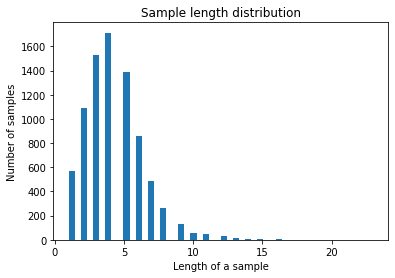

In [289]:
import matplotlib.pyplot as plt

plt.hist([len(sent_tokenize(s)) for s in df_train['long_question']], 50)
plt.xlabel('Length of a sample')
plt.ylabel('Number of samples')
plt.title('Sample length distribution')
plt.show()

In [290]:
sen5 = sen10 = sen15 = sen20 = 0
for text in df_train['long_question']:
  if len(sent_tokenize(text)) < 5:
    sen5 += 1
  elif len(sent_tokenize(text)) >= 5 and len(sent_tokenize(text)) < 10:
    sen10 += 1
  elif len(sent_tokenize(text)) >= 10 and len(sent_tokenize(text)) < 15:
    sen15 += 1
  else:
    sen20 += 1

In [291]:
leng = len(df_train)
thisdict = {
  "<5": sen5/leng*100,
  "[5:10)": sen10/leng*100,
  "[10:15)": sen15/leng*100,
  "[15:~)": sen20/leng*100,
}
for key in thisdict:
  print(key, ':', thisdict[key])

<5 : 59.809779295207896
[5:10) : 38.178270942567984
[10:15) : 1.8534325082307037
[15:~) : 0.15851725399341543


## Number of documents by word length

### Answer

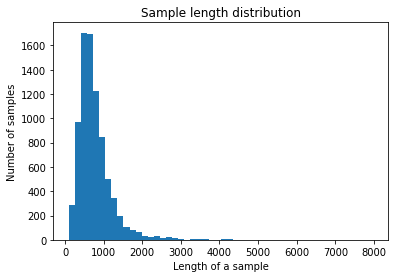

In [292]:
import matplotlib.pyplot as plt

plt.hist([len(str(s)) for s in df_train['answer']], 50)
plt.xlabel('Length of a sample')
plt.ylabel('Number of samples')
plt.title('Sample length distribution')
plt.show()

In [293]:
count100 = count300 = count500 = count700 = count1000 = count10000 = 0
for s in df_train['answer']:
  if (len(str(s)) < 100):
    count100 += 1
  elif (len(str(s)) >= 100 and len(str(s)) < 300):
    count300 += 1
  elif (len(str(s)) >= 300 and len(str(s)) < 500):
    count500 += 1
  elif (len(str(s)) >= 500 and len(str(s)) < 700):
    count700 += 1
  elif (len(str(s)) >= 700 and len(str(s)) < 1000):
    count1000 += 1
  else:
    count10000 += 1

In [294]:
leng = len(df_train)
thisdict = {
  "<100": count100/leng*100,
  "[100:300)": count300/leng*100,
  "[300:500)": count500/leng*100,
  "[500:700)": count700/leng*100,
  "[700:1000)": count1000/leng*100,
  "[1000:~)": count10000/leng*100,
}
for key in thisdict:
  print(key, ':', thisdict[key])

<100 : 0.01219363492257042
[100:300) : 6.1455920009754905
[300:500) : 20.33898305084746
[500:700) : 27.179612242409462
[700:1000) : 25.93586148030728
[1000:~) : 20.38775759053774


### Long question

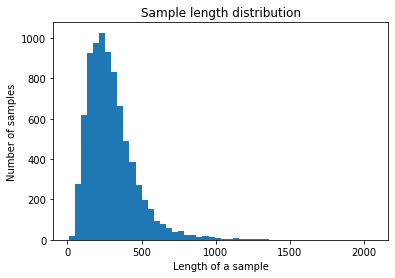

In [295]:
import matplotlib.pyplot as plt

plt.hist([len(str(s)) for s in df_train['long_question']], 50)
plt.xlabel('Length of a sample')
plt.ylabel('Number of samples')
plt.title('Sample length distribution')
plt.show()

In [296]:
count100 = count300 = count500 = count700 = count1000 = count10000 = 0
for s in df_train['long_question']:
  if (len(str(s)) < 100):
    count100 += 1
  elif (len(str(s)) > 100 and len(str(s)) < 300):
    count300 += 1
  elif (len(str(s)) > 300 and len(str(s)) < 500):
    count500 += 1
  elif (len(str(s)) > 500 and len(str(s)) < 700):
    count700 += 1
  elif (len(str(s)) > 700 and len(str(s)) < 1000):
    count1000 += 1
  else:
    count10000 += 1

In [297]:
leng = len(df_train)
thisdict = {
  "<100": count100/leng*100,
  "(100:300)": count300/leng*100,
  "(300:500)": count500/leng*100,
  "(500:700)": count700/leng*100,
  "(700:1000)": count1000/leng*100,
  "(1000:~)": count10000/leng*100,
}
for key in thisdict:
  print(key, ':', thisdict[key])

<100 : 4.828679429337885
(100:300) : 54.176319960980365
(300:500) : 30.752347274722595
(500:700) : 6.925984636019998
(700:1000) : 2.243628825752957
(1000:~) : 1.0730398731861968


# Preprocessing

In [264]:
df_train = df_train[df_train.answer != 'None']
df_train = df_train[df_train.answer != 'none']
df_train = df_train[df_train.answer != ' ']
df_train = df_train[df_train.answer != '']

df_test = df_test[df_test.answer != 'None']
df_test = df_test[df_test.answer != 'none']
df_test = df_test[df_test.answer != ' ']
df_test = df_test[df_test.answer != '']

df_val = df_val[df_val.answer != 'None']
df_val = df_val[df_val.answer != 'none']
df_val = df_val[df_val.answer != ' ']
df_val = df_val[df_val.answer != '']

In [265]:
df_train.tail()

,short_question,long_question,answer,link
1011,None,"Tôi có tiền sử tiểu cầu thấp, PLT 130.000-140....","Chào anh,Tình trạng tiểu cầu của anh dưới ngưỡ...",https://vnexpress.net/tu-van-tiem-vaccine-covi...
1012,None,"Tôi bị huyết áp cao phải uống thuốc hàng ngày,...","Chào anh,\nViệc uống thuốc huyết áp duy trì hà...",https://vnexpress.net/tu-van-tiem-vaccine-covi...
1013,None,Vaccine AstraZeneca tôi thấy ở nước ngoài chỉ ...,"Chào bạn,\nTheo thông tin kê toa của nhà sản x...",https://vnexpress.net/tu-van-tiem-vaccine-covi...
1014,None,"Em 33 tuổi, cao 1,68 m, nặng 90 kg, bị dị ứng ...","Chào Anh/Chị,\nTheo mô tả thì trường hợp dị ứn...",https://vnexpress.net/tu-van-tiem-vaccine-covi...
1015,None,"Tôi thỉnh thoảng bị dị ứng ngứa nổi mẩn, đặc b...","Chào anh,\nTheo hướng dẫn của Bộ Y tế, anh thu...",https://vnexpress.net/tu-van-tiem-vaccine-covi...


In [266]:
# short_question
for i in range(len(df_train)):
  df_train['short_question'][i] = df_train['short_question'][i].strip()
  df_train['short_question'][i] = df_train['short_question'][i].lower()
  df_train['short_question'][i] = df_train['short_question'][i].replace("\n", "")
  df_train['short_question'][i] = re.sub(r'[^\w\s]','', df_train['short_question'][i])
# long_question
for i in range(len(df_train)):
  df_train['long_question'][i] = df_train['long_question'][i].strip()
  df_train['long_question'][i] = df_train['long_question'][i].lower()
  df_train['long_question'][i] = df_train['long_question'][i].replace("\n", "")
  df_train['long_question'][i] = re.sub(r'[^\w\s]','', df_train['long_question'][i])
# answer
for i in range(len(df_train)):
  df_train['answer'][i] = df_train['answer'][i].strip()
  df_train['answer'][i] = df_train['answer'][i].lower()
  df_train['answer'][i] = df_train['answer'][i].replace("\n", "")
  df_train['answer'][i] = re.sub(r'[^\w\s]','', df_train['answer'][i])


In [267]:
df_train = df_train.dropna()
df_train = df_train.drop_duplicates()
df_test = df_test.dropna()
df_test = df_test.drop_duplicates()
df_val = df_val.dropna()
df_val = df_val.drop_duplicates()

In [268]:
len(df_train)

1016

### Tokenize

In [269]:
# pip install pyvi


In [270]:
from pyvi import ViTokenizer
df_train["long_tokenize"] = ""
df_train["answer_tokenize"] = ""
for i in range(len(df_train["long_question"])):
  try:
    df_train["long_tokenize"][i] = ViTokenizer.tokenize(str(df_train["long_question"][i]))
  except:
    print('..')
for i in range(len(df_train["answer"])):
  try:
    df_train["answer_tokenize"][i] = ViTokenizer.tokenize(str(df_train["answer"][i]))
  except:
    print('..')

In [271]:
df_train

,short_question,long_question,answer,link,long_tokenize,answer_tokenize
0,bìu dương vật sưng to cứng và tinh hoàn không ...,xin chào bác sĩ cho em hỏi bìu dương vật sưng ...,chào em với câu hỏi bìu dương vật sưng to cứng...,https://www.vinmec.com/vi/tin-tuc/hoi-dap-bac-...,xin chào bác_sĩ cho em hỏi bìu dương_vật sưng ...,chào em với câu hỏi bìu dương_vật sưng to cứng...
1,trẻ sơ sinh vàng da vàng mắt mức độ nhẹ có đán...,em chào bác sĩ bé gái nhà em khi sinh được 36 ...,chào bạn vàng da là tình trạng rất phổ biến ở ...,https://www.vinmec.com/vi/tin-tuc/hoi-dap-bac-...,em chào bác_sĩ bé gái nhà em khi sinh được 36 ...,chào bạn vàng da là tình_trạng rất phổ_biến ở ...
2,bị đau mắt đỏ nhỏ thuốc mỡ chlorocinah có khỏi...,chào dược sĩ con tôi bị đau mắt đỏ dược sĩ ch...,chào bạn với câu hỏi bị đau mắt đỏ nhỏ thuốc m...,https://www.vinmec.com/vi/tin-tuc/hoi-dap-bac-...,chào dược_sĩ con tôi bị đau mắt đỏ dược_sĩ cho...,chào bạn với câu hỏi bị đau mắt đỏ nhỏ thuốc_m...
3,tự nhiên xuất hiện vết bầm kèm xuất huyết là b...,chào bác sĩgần 2 tháng trở lại đây em có triệu...,được giải đáp bởi bác sĩ lê thị thanh hương b...,https://www.vinmec.com/vi/tin-tuc/hoi-dap-bac-...,chào bác sĩgần 2 tháng trở_lại đây em có triệu...,được giải_đáp bởi bác_sĩ lê thị thanh hương bá...
4,điều trị dứt điểm huyết khối tĩnh mạch chi như...,chào bác sĩem bị huyết khối tĩnh mạch chi dưới...,chào bạnvới câu hỏi điều trị dứt điểm huyết kh...,https://www.vinmec.com/vi/tin-tuc/hoi-dap-bac-...,chào bác sĩem bị huyết khối tĩnh_mạch chi dưới...,chào bạnvới câu hỏi điều_trị dứt_điểm huyết kh...
...,...,...,...,...,...,...
1011,none,tôi có tiền sử tiểu cầu thấp plt 130000140000 ...,chào anhtình trạng tiểu cầu của anh dưới ngưỡn...,https://vnexpress.net/tu-van-tiem-vaccine-covi...,tôi có tiền_sử tiểu_cầu thấp plt 130000140000 ...,chào anhtình trạng tiểu_cầu của anh dưới ngưỡn...
1012,none,tôi bị huyết áp cao phải uống thuốc hàng ngày ...,chào anhviệc uống thuốc huyết áp duy trì hàng ...,https://vnexpress.net/tu-van-tiem-vaccine-covi...,tôi bị huyết_áp_cao phải uống thuốc hàng ngày ...,chào anhviệc uống thuốc huyết_áp duy_trì hàng ...
1013,none,vaccine astrazeneca tôi thấy ở nước ngoài chỉ ...,chào bạntheo thông tin kê toa của nhà sản xuất...,https://vnexpress.net/tu-van-tiem-vaccine-covi...,vaccine astrazeneca tôi thấy ở nước_ngoài chỉ_...,chào bạntheo thông_tin kê toa của nhà sản_xuất...
1014,none,em 33 tuổi cao 168 m nặng 90 kg bị dị ứng với ...,chào anhchịtheo mô tả thì trường hợp dị ứng củ...,https://vnexpress.net/tu-van-tiem-vaccine-covi...,em 33 tuổi cao 168 m nặng 90 kg bị dị_ứng với ...,chào anhchịtheo mô_tả thì trường_hợp dị_ứng củ...


### Write stopwords list to file

In [272]:
def get_stopwords(documents, threshold=3):
    """
    :param documents: list of documents
    :param threshold:
    :return: list of words has idf <= threshold
    """
    tfidf = TfidfVectorizer(min_df=5)
    tfidf_matrix = tfidf.fit_transform(documents)
    features = tfidf.get_feature_names()
    stopwords = []
    print(min(tfidf.idf_), max(tfidf.idf_), len(features))
    for index, feature in enumerate(features):
        if tfidf.idf_[index] <= threshold:
            stopwords.append(feature)
    return stopwords

In [273]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

stopwords = get_stopwords(df_train["long_tokenize"], threshold=3)
stopwords = stopwords + get_stopwords(df_train["long_question"], threshold=3)
stopwords = stopwords + get_stopwords(df_train["answer"], threshold=3)
with open('stopwords.txt', 'w', encoding='utf8') as fp:
    for word in stopwords:
        fp.write(word + '\n')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


1.2325286535419315 6.1328529268205045 1033


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


1.2068077010248688 6.1328529268205045 1054


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


1.0808624470423354 6.1328529268205045 1434


In [274]:
for i in range(len(df_train["long_tokenize"])):
  try:
    df_train["long_tokenize"][i] = df_train["long_tokenize"][i].split(" ")
  except:
    print('ok')
for i in range(len(df_train["answer_tokenize"])):
  try:
    df_train["answer_tokenize"][i] = df_train["answer_tokenize"][i].split(" ")
  except:
    print('ok')

### Read stopword file

In [276]:
with open('/content/stopwords.txt') as f:
    lines = f.readlines()


In [277]:
for i in range(len(lines)):
  lines[i] = (lines[i].rstrip("\n"))

In [278]:
len(lines)

312

### Remove stopworstopwords

In [279]:
import re
long_tokenize = ''
answer_tokenize = ''
for i in range(len(df_train["long_tokenize"])):
  try:
    for word in df_train["long_tokenize"][i]:
      #remove stopword
      if (word in lines):
        long_tokenize = [word for word in df_train["long_tokenize"][i] if word not in lines]
    df_train["long_tokenize"][i] = long_tokenize
  except: 
    print('err')
for i in range(len(df_train["answer_tokenize"])):
  try:
    for word in df_train["answer_tokenize"][i]:
      #remove stopword
      if (word in lines):
        answer_tokenize = [word for word in df_train["answer_tokenize"][i] if word not in lines]  
    df_train["answer_tokenize"][i] = answer_tokenize 
  except: 
    print('err')

In [280]:
df_train.head()

,short_question,long_question,answer,link,long_tokenize,answer_tokenize
0,bìu dương vật sưng to cứng và tinh hoàn không ...,xin chào bác sĩ cho em hỏi bìu dương vật sưng ...,chào em với câu hỏi bìu dương vật sưng to cứng...,https://www.vinmec.com/vi/tin-tuc/hoi-dap-bac-...,"[bìu, dương_vật, sưng, to, cứng, tinh_hoàn, câ...","[bìu, dương_vật, sưng, to, cứng, tinh_hoàn, câ..."
1,trẻ sơ sinh vàng da vàng mắt mức độ nhẹ có đán...,em chào bác sĩ bé gái nhà em khi sinh được 36 ...,chào bạn vàng da là tình trạng rất phổ biến ở ...,https://www.vinmec.com/vi/tin-tuc/hoi-dap-bac-...,"[bé, gái, nhà, 36, tuần, 2, bình_thường, thứ, ...","[vàng, da, tình_trạng, phổ_biến, ở, trẻ, sơ_si..."
2,bị đau mắt đỏ nhỏ thuốc mỡ chlorocinah có khỏi...,chào dược sĩ con tôi bị đau mắt đỏ dược sĩ ch...,chào bạn với câu hỏi bị đau mắt đỏ nhỏ thuốc m...,https://www.vinmec.com/vi/tin-tuc/hoi-dap-bac-...,"[dược_sĩ, con, mắt, đỏ, dược_sĩ, mắt, đỏ, nhỏ,...","[mắt, đỏ, nhỏ, thuốc_mỡ, chlorocinah, khỏi, dư..."
3,tự nhiên xuất hiện vết bầm kèm xuất huyết là b...,chào bác sĩgần 2 tháng trở lại đây em có triệu...,được giải đáp bởi bác sĩ lê thị thanh hương b...,https://www.vinmec.com/vi/tin-tuc/hoi-dap-bac-...,"[sĩgần, 2, trở_lại, triệu_chứng, ngứa, da, ở, ...","[giải_đáp, lê, thanh, hương, hồi_sức, cấp_cứu,..."
4,điều trị dứt điểm huyết khối tĩnh mạch chi như...,chào bác sĩem bị huyết khối tĩnh mạch chi dưới...,chào bạnvới câu hỏi điều trị dứt điểm huyết kh...,https://www.vinmec.com/vi/tin-tuc/hoi-dap-bac-...,"[sĩem, huyết, khối, tĩnh_mạch, chi, dưới, bên,...","[dứt_điểm, huyết, khối, tĩnh_mạch, chi, thế_nà..."


In [281]:
df_train.to_csv(r'/content/drive/MyDrive/QA_KLTN/Dataset/Data_preprocess/Preprocessed data/Preprocessed_train.csv', index=False, header=True)


### Remove accent

In [282]:
df_train

,short_question,long_question,answer,link,long_tokenize,answer_tokenize
0,bìu dương vật sưng to cứng và tinh hoàn không ...,xin chào bác sĩ cho em hỏi bìu dương vật sưng ...,chào em với câu hỏi bìu dương vật sưng to cứng...,https://www.vinmec.com/vi/tin-tuc/hoi-dap-bac-...,"[bìu, dương_vật, sưng, to, cứng, tinh_hoàn, câ...","[bìu, dương_vật, sưng, to, cứng, tinh_hoàn, câ..."
1,trẻ sơ sinh vàng da vàng mắt mức độ nhẹ có đán...,em chào bác sĩ bé gái nhà em khi sinh được 36 ...,chào bạn vàng da là tình trạng rất phổ biến ở ...,https://www.vinmec.com/vi/tin-tuc/hoi-dap-bac-...,"[bé, gái, nhà, 36, tuần, 2, bình_thường, thứ, ...","[vàng, da, tình_trạng, phổ_biến, ở, trẻ, sơ_si..."
2,bị đau mắt đỏ nhỏ thuốc mỡ chlorocinah có khỏi...,chào dược sĩ con tôi bị đau mắt đỏ dược sĩ ch...,chào bạn với câu hỏi bị đau mắt đỏ nhỏ thuốc m...,https://www.vinmec.com/vi/tin-tuc/hoi-dap-bac-...,"[dược_sĩ, con, mắt, đỏ, dược_sĩ, mắt, đỏ, nhỏ,...","[mắt, đỏ, nhỏ, thuốc_mỡ, chlorocinah, khỏi, dư..."
3,tự nhiên xuất hiện vết bầm kèm xuất huyết là b...,chào bác sĩgần 2 tháng trở lại đây em có triệu...,được giải đáp bởi bác sĩ lê thị thanh hương b...,https://www.vinmec.com/vi/tin-tuc/hoi-dap-bac-...,"[sĩgần, 2, trở_lại, triệu_chứng, ngứa, da, ở, ...","[giải_đáp, lê, thanh, hương, hồi_sức, cấp_cứu,..."
4,điều trị dứt điểm huyết khối tĩnh mạch chi như...,chào bác sĩem bị huyết khối tĩnh mạch chi dưới...,chào bạnvới câu hỏi điều trị dứt điểm huyết kh...,https://www.vinmec.com/vi/tin-tuc/hoi-dap-bac-...,"[sĩem, huyết, khối, tĩnh_mạch, chi, dưới, bên,...","[dứt_điểm, huyết, khối, tĩnh_mạch, chi, thế_nà..."
...,...,...,...,...,...,...
1011,none,tôi có tiền sử tiểu cầu thấp plt 130000140000 ...,chào anhtình trạng tiểu cầu của anh dưới ngưỡn...,https://vnexpress.net/tu-van-tiem-vaccine-covi...,"[tiền_sử, tiểu_cầu, thấp, plt, 130000140000, c...","[anhtình, tiểu_cầu, anh, dưới, ngưỡng, 150, mứ..."
1012,none,tôi bị huyết áp cao phải uống thuốc hàng ngày ...,chào anhviệc uống thuốc huyết áp duy trì hàng ...,https://vnexpress.net/tu-van-tiem-vaccine-covi...,[huyết_áp_cao],"[anhviệc, huyết_áp, duy_trì, cần_thiết, bệnh_l..."
1013,none,vaccine astrazeneca tôi thấy ở nước ngoài chỉ ...,chào bạntheo thông tin kê toa của nhà sản xuất...,https://vnexpress.net/tu-van-tiem-vaccine-covi...,"[astrazeneca, thấy, ở, nước_ngoài, chỉ_định, c...","[bạntheo, thông_tin, kê, toa, nhà, sản_xuất, h..."
1014,none,em 33 tuổi cao 168 m nặng 90 kg bị dị ứng với ...,chào anhchịtheo mô tả thì trường hợp dị ứng củ...,https://vnexpress.net/tu-van-tiem-vaccine-covi...,"[33, 168, m, nặng, 90, kg, dị_ứng, con, hến, t...","[anhchịtheo, mô_tả, trường_hợp, dị_ứng, anhchị..."


# Data visualization

### Word_cloudcloud

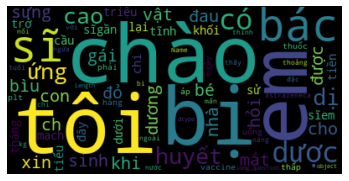

In [283]:
# Start with one review:
from wordcloud import WordCloud 

text = df_train.long_question	

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(str(text))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Word_cloud after removing stopwords

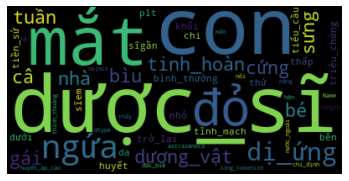

In [284]:
from wordcloud import WordCloud 

# Start with one review:
text = df_train.long_tokenize

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(str(text))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()